## Desafío - Clasificación desde Machine Learning

Nombre: __Hugo Zúñiga__

Profesor: Josué Fredes

Generación: __G4__

* Para poder realziar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv). 
* Una vez terminado el desafío, comprime la carpeta y sube el `.zip`.

### Descripción

En esta sesión trabajaremos con una base de datos sobre clientes morosos de un banco. Dentro de ésta se registran las siguientes observaciones:

* `default`: Variable binaria. Registra si el cliente entró en morosidad o no.
* `income`: Ingreso promedio declarado por el cliente.
* `balance`: Total de saldo en la cuenta de crédito.
* `student`: Variable binaria. Registra si el cliente es estudiante o no.

### Desafío 1: Preparación del ambiente de trabajo

* Importe los módulos básicos para el análisis de datos
* Importe `seaborn`
* Importe `statsmodels`
* Importe `LogisticRegression`, `train_test_split`, `StandardScaler`, `classification_report` y `roc_curve` de sklearn

In [1]:
# Importo las librerías clásicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Importo statsmodels 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Importo Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

#definimos parámetros de los gráficos
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (10,6)

In [2]:
df = pd.read_csv('default_credit.csv')
df.head()

index default student      balance        income
0      1      No      No   729.526495  44361.625074
1      2      No     Yes   817.180407  12106.134700
2      3      No      No  1073.549164  31767.138947
3      4      No      No   529.250605  35704.493935
4      5      No      No   785.655883  38463.495879

### Desafío 2: Análisis exploratorio

* Explore las principales relaciones entre las variables. Utilizando los métodos `boxplot` y `lmplot` de `seaborn` implemente los siguientes gráficos:
    * Un boxplot del balance total de las cuentas, segmentado por el status de estudiante. 
    * Un boxplot del ingreso total de cada cliente, segmentado por el status de estudiante. 
    * Un boxplot del balance total de las cuentas, segmentado por el status de default.
    * Un boxplot del ingreso total de cada cliente, segmentado por el status de default.
    * Un diagrama de dispersión entre `balance` e `income`, segmentado por el status de estudiante.
    * Un diagrama de dispersión entre `balance` e `income`, segmentado por el status de default.
* Comente brevemente sobre los principales patrones de comportamiento.
* *tip*: Puede utilizar el argumento `hue` en `lmplot` para identificar las observaciones por status.

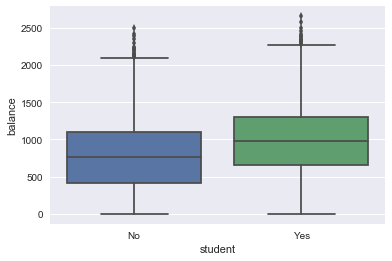

In [3]:
# balance vs student
sns.boxplot(x="student", y="balance", data=df)

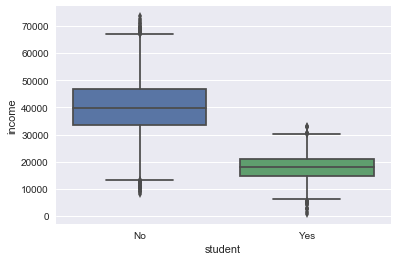

In [4]:
# income vs student
sns.boxplot(x="student", y="income", data=df)

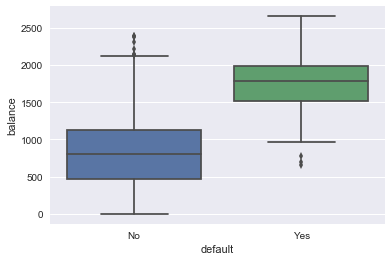

In [5]:
# balance vs default
sns.boxplot(x="default", y="balance", data=df)

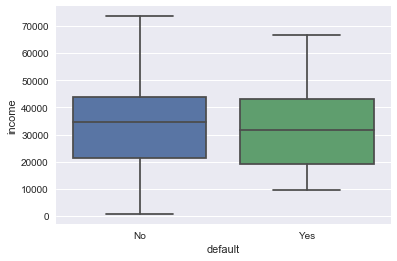

In [6]:
# income vs default
sns.boxplot(x="default", y="income", data=df)

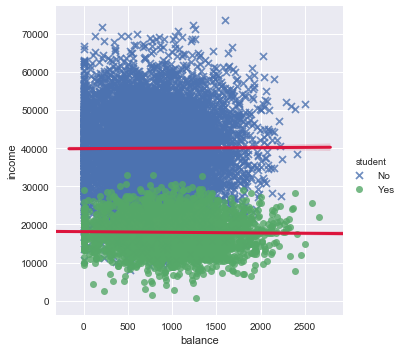

In [7]:
# Diagrama de dispersión entre balance vs income, por student
sns.lmplot(x='balance', y='income', data=df, logistic=False, hue='student',
          line_kws={'color':'crimson','lw':3},
          markers=['x','o'])

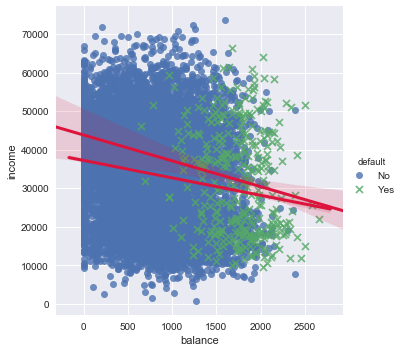

In [8]:
# Diagrama de dispersión entre balance vs income, por default
sns.lmplot(x='balance', y='income', data=df, logistic=False, hue='default',
          line_kws={'color':'crimson','lw':3},
          markers=['o','x'])

__Comentario:__ 

* En los graficos de caja:
    * Es posible ver que en general la mitad de las observaciones es menor que o igual al valor de la mediana y la mitad es mayor que o igual al valor de la mediana, es decir, no son datos asimetricos.
* En los graficos de dispersion:
    * En el primer grafico es posible apreciar que no exite correlacion entre las varibles balance e income, segmentado por el status de estudiante.
    * En el segundo grafico es posible apreciar que en las variables balance e income, segmentado por el status de default existe correlacion negativa debil. Si fuese mas fuerte, la pendiente seria mayor.

### Desafío 3: Modelación econométrica

* Recodifique las variables `student` y `default` para que adquieran atributos numéricos.
* Implemente el siguiente modelo econométrico:

$$\log\left(\frac{Pr({ default = 1})}{1 - Pr({ default = 1})}\right)={{\beta }_{0} + {\beta }_{1} \cdot {balance} + {\beta }_{2} \cdot {income} + {\beta }_{3} \cdot {student} }$$

* A partir de este modelo, depúrelo y mantenga las principales características. Ejecute de nuevo el modelo y comente brevemente sobre el comportamiento de los atributos.

In [9]:
# Recodifico student según el menor valor
df['student'].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [10]:
# Cuando es estudiante es 1 y sino 0
df['f_student'] = np.where(df['student'] == 'Yes', 1, 0)
df.head()

index default student      balance        income  f_student
0      1      No      No   729.526495  44361.625074          0
1      2      No     Yes   817.180407  12106.134700          1
2      3      No      No  1073.549164  31767.138947          0
3      4      No      No   529.250605  35704.493935          0
4      5      No      No   785.655883  38463.495879          0

In [11]:
# Recodifico default según el menor valor
df['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [12]:
# Cuando tiene morosidad es 1 sino 0
df['f_default'] = np.where(df['default']=='Yes',1,0)
df.head()

index default student      balance        income  f_student  f_default
0      1      No      No   729.526495  44361.625074          0          0
1      2      No     Yes   817.180407  12106.134700          1          0
2      3      No      No  1073.549164  31767.138947          0          0
3      4      No      No   529.250605  35704.493935          0          0
4      5      No      No   785.655883  38463.495879          0          0

In [13]:
# Modelo econométrico 
m_logit = smf.logit('f_default ~ balance + income + f_student', df).fit()
m_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.462      
Dependent Variable: f_default        AIC:              1579.5448  
Date:               2019-07-13 16:23 BIC:              1608.3862  
No. Observations:   10000            Log-Likelihood:   -785.77    
Df Model:           3                LL-Null:          -1460.3    
Df Residuals:       9996             LLR p-value:      3.2575e-292
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
-------------------------------------------------------------------
             Coef.    Std.Err.     z      P>|z|    [0.025    0.975]
-------------------------------------------------------------------
Intercept   -10.8690    0.4923  -22.0793  0.0000  -11.8339  -9.9042
balance       0.0057    0.0002   24.7365  0.0000    0.0053   0.0062
income        0.0000    0.0000    0.3698  0.7115   -0.0000   0.0000
f_student    -0.6468    0.2363   -2.7376  0.0062   -1.1098  -0.1837
==================================================================

"""

__Comentario:__ 

Se puede observar que los ingresos promedio no tiene una significancia estadística en el modelo. Al refactorizar, se hará sin esta variable.

In [14]:
m_logit2 = smf.logit('f_default ~ balance + f_student', df).fit()
m_logit2.summary2()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.462      
Dependent Variable: f_default        AIC:              1577.6816  
Date:               2019-07-13 16:23 BIC:              1599.3126  
No. Observations:   10000            Log-Likelihood:   -785.84    
Df Model:           2                LL-Null:          -1460.3    
Df Residuals:       9997             LLR p-value:      1.1893e-293
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
-------------------------------------------------------------------
            Coef.    Std.Err.     z      P>|z|    [0.025    0.975] 
-------------------------------------------------------------------
Intercept  -10.7495    0.3692  -29.1149  0.0000  -11.4731  -10.0259
balance      0.0057    0.0002   24.7485  0.0000    0.0053    0.0062
f_student   -0.7149    0.1475   -4.8459  0.0000   -1.0040   -0.4257
==================================================================

"""

__Comentario:__

Podemos ver que el peso de balance es muy bajo, al contrario que f_student

### Desafío 4: Entrenar

A partir del modelo depurado, genere un modelo predictivo con las siguientes características:

* Estandarize la matriz de atributos.
* Genere subconjuntos de entrenamiento y validación, separando el 33% de la muestra en el conjunto de validación.
* Implemente el modelo sin alterar los hiperparámetros.
* Genere la predicción de las clases y de la probabilidad.
* Reporte las métricas de precision, recall y f1 para ambas clases. 
* Grafique la curva Receiver Operator Characteristic.
* En base a los pasos, comente sobre el desempeño predictivo del modelo.

In [15]:
# Estandarizo la matriz
df_std = StandardScaler().fit_transform(df.loc[:,['balance','f_student']])
df_std

/Users/hugopriest/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/hugopriest/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.21883482, -0.64593619],
       [-0.03761593,  1.54814054],
       [ 0.49241019, -0.64593619],
       ...,
       [ 0.02075107, -0.64593619],
       [ 1.51674204, -0.64593619],
       [-1.31169066,  1.54814054]])

In [16]:
# Genero los subconjuntos de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(df_std,
                                                   df['f_default'],
                                                   test_size=.33,
                                                   random_state=16254)

In [17]:
# Implemento el modelo
def_model = LogisticRegression().fit(X_train, y_train)

/Users/hugopriest/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
def_model.coef_

array([[ 2.6330636 , -0.24403897]])

In [19]:
# Genero las predicciones de clases
yhat = def_model.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
# Genero las predicciones de probabilidad
yhat_pr = def_model.predict_proba(X_test)
yhat_pr

array([[9.99527673e-01, 4.72327408e-04],
       [9.98206209e-01, 1.79379060e-03],
       [9.93866649e-01, 6.13335136e-03],
       ...,
       [9.25961440e-01, 7.40385595e-02],
       [8.87977363e-01, 1.12022637e-01],
       [9.55625830e-01, 4.43741698e-02]])

In [21]:
# Reporto las métricas para las clases
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3193
           1       0.70      0.28      0.40       107

   micro avg       0.97      0.97      0.97      3300
   macro avg       0.84      0.64      0.69      3300
weighted avg       0.97      0.97      0.97      3300



Text(0.5, 1.0, 'AUC = 0.94')

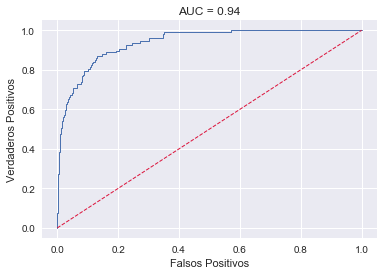

In [22]:
# Grafico la curva ROC
false_positive, true_positive, threshold = roc_curve(y_test, yhat_pr[:,1])
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0,1], linestyle='--', lw=1, color='crimson')
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos')
plt.title(f'AUC = {round(roc_auc_score(y_test, yhat_pr[:,1]),3)}')

__Comentario:__

Al observar la curva ROC es posible apreciar que el modelo es optimo pues existe una amplia area bajo la curva.